In [1]:
import numpy as np
import pandas as pd

In [2]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import pickle

In [3]:
df = pd.read_csv('data.csv', header=None)
df.drop(0, axis=1, inplace=True)
df = shuffle(df)

In [4]:
df

,1,2,3,4,5,6,7,8,9,10,...,760,761,762,763,764,765,766,767,768,769
821,0.064119,0.035429,0.050643,0.071727,0.087376,0.122370,0.130629,0.203443,0.203660,0.286472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0
64,1.221367,0.366858,0.416070,0.389227,0.590551,0.684503,1.185576,0.935039,2.729062,2.219041,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,3.0,9.000000,1.0
568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
284,0.309685,0.168919,0.225225,0.197072,0.422297,0.844595,0.788288,1.013514,0.760135,1.069820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,NaN
104,0.245098,0.069130,0.100553,0.062846,0.100553,0.087984,0.201106,0.175968,0.276521,0.289090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093023,0.000000,...,6.0,2.0,4.0,3.0,5.0,2.0,3.0,2.0,51.999996,1.0
595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,369.0,476.0,399.0,523.0,455.0,471.0,362.0,338.0,1058.000000,0.0
908,1.374036,0.124912,0.116147,0.324334,0.512798,0.751666,0.834940,0.926981,1.332398,0.442672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
471,5.332850,1.469254,1.251587,1.360421,1.596227,1.795756,2.412480,2.104118,2.720842,2.303646,...,4.0,8.0,10.0,7.0,3.0,2.0,6.0,4.0,26.000000,0.0


In [5]:
df[769].value_counts()

0.0    604
1.0    409
Name: 769, dtype: int64

In [6]:
# controllo se esistono valori nulli
# print(df.isnull().values.any())
# guardo dove sono i valori nulli e quanti sono
df.dropna(inplace=True)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=0)

In [8]:
df.iloc[:,-1]

821    1.0
64     1.0
568    0.0
104    0.0
324    0.0
      ... 
19     1.0
595    0.0
908    0.0
471    0.0
466    0.0
Name: 769, Length: 1013, dtype: float64

In [9]:
df.iloc[:,:-1]

,1,2,3,4,5,6,7,8,9,10,...,759,760,761,762,763,764,765,766,767,768
821,0.064119,0.035429,0.050643,0.071727,0.087376,0.122370,0.130629,0.203443,0.203660,0.286472,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
64,1.221367,0.366858,0.416070,0.389227,0.590551,0.684503,1.185576,0.935039,2.729062,2.219041,...,2.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,3.0,9.000000
568,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
104,0.245098,0.069130,0.100553,0.062846,0.100553,0.087984,0.201106,0.175968,0.276521,0.289090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
324,0.173077,0.134615,0.288462,0.346154,0.365385,0.365385,0.634615,0.653846,0.269231,1.557692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.093023,0.000000,...,4.0,6.0,2.0,4.0,3.0,5.0,2.0,3.0,2.0,51.999996
595,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,346.0,369.0,476.0,399.0,523.0,455.0,471.0,362.0,338.0,1058.000000
908,1.374036,0.124912,0.116147,0.324334,0.512798,0.751666,0.834940,0.926981,1.332398,0.442672,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
471,5.332850,1.469254,1.251587,1.360421,1.596227,1.795756,2.412480,2.104118,2.720842,2.303646,...,13.0,4.0,8.0,10.0,7.0,3.0,2.0,6.0,4.0,26.000000


In [10]:
from sklearn import svm

In [11]:
clf = svm.SVC(class_weight='balanced', C=950)
clf.fit(X_train, y_train)

SVC(C=950, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = clf.predict(X_train)
acc = metrics.accuracy_score(y_train, y_pred)
print('training')
print(acc)

training
0.9844851904090268


In [15]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
rec = metrics.recall_score(y_test, y_pred)
f1 = metrics.f1_score(y_test, y_pred)
print('test')
print(acc)
print(rec)
print(f1)
metrics.confusion_matrix(y_test, y_pred)

test
0.8618421052631579
0.7983870967741935
0.825


array([[163,  17],
       [ 25,  99]], dtype=int64)

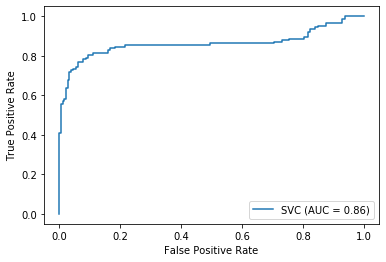

In [21]:
from sklearn import datasets, metrics, model_selection, svm
metrics.plot_roc_curve(clf, X_test, y_test)  # doctest: +SKIP
plt.show()

In [14]:
df = pd.read_csv('data.csv', header=None)
df.drop(0, axis=1, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)

In [15]:
clf = svm.SVC(class_weight='balanced', C=950)
results = cross_val_score(clf, df.drop([769], axis=1), df[769], cv=10)
print('SVM')
print(results)
print(results.mean())

SVM
[0.88235294 0.90196078 0.83333333 0.89108911 0.9009901  0.85148515
 0.88118812 0.96039604 0.85148515 0.93069307]
0.8884973791496795


df = pd.read_csv('data.csv', header=None)
df.drop(0, axis=1, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression

In [16]:
print('Logistic Regression')
lg = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = lg.predict(X_train)
acc = metrics.accuracy_score(y_train, y_pred)
print('training')
print(acc)


y_pred = lg.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('test')
print(acc)
metrics.confusion_matrix(y_test, y_pred)

Logistic Regression


NameError: name 'LogisticRegression' is not defined

In [17]:
df = pd.read_csv('data.csv', header=None)
df.drop(0, axis=1, inplace=True)
df.dropna(inplace=True)
df = shuffle(df)
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.3, random_state=0)

In [18]:
clf = svm.SVC(class_weight='balanced')
clf.fit(df.drop([769], axis=1), df[769])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
y_pred = clf.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
print('test')
print(acc)
metrics.confusion_matrix(y_test, y_pred)

test
0.9078947368421053


array([[176,   9],
       [ 19, 100]], dtype=int64)

In [20]:
with open('C:/Users/fabio/Desktop/Mag1.2/VisionAndCognitiveSystem/Project/vision_final_project/svm/model.pickle', 'wb') as model_file:
    pickle.dump(clf, model_file)

In [21]:
with open('../svm/model.pickle', 'rb') as model_file:

    clf2 = pickle.load(model_file)

In [22]:
clf2.predict(X_test)

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 1., 1.